Bollywood Box Office 2017-2020 Kaggle Dataset
<br>
Sumedha Chalasani


Bollywood refers to the Indian Film Industry, specifically films in Hindi.
The dataset contains information about movies released in 2017-2020, as well as box office information regarding these movies.
<br>
What the dataset contains: - names of movies released in 2017-2020 - opening day earnings -
opening weekend earnings - first week earnings - total earnings - worldwide earnings - genre -
director’s name - release dates - release day - release month - release year - runtime - producer -
banner - actors - movie details
<br>
All movie earnings are recorded in crores, which is a unit of measurement in the Indian numbering
system. One crore is equal to 10 million Indian rupees or 119,885.31 US dollars.


Question 1: Which director directed the movie with the highest first week earnings?
<br>
This allows us to see which director (and movie) was the most successful during the first week of
box office sales.

In [11]:
import numpy as np
import pandas as pd

fhandle = open('bollywood_box_clean1.csv', 'r')
filedf = pd.read_csv('bollywood_box_clean1.csv')

firstweek = filedf['movie_firstweek']
highestweek = 0
rownum = 0
rownumsave = []
for item in firstweek: #iterating through all values in firstweek earnings column
    rownum += 1 #finding the row number by adding 1 each iteration
    if int(item) > highestweek:
        highestweek = item #checking for highest value in firstweek earnings
        rownumsave.append(rownum - 1) #saving the row number of the highest earnings
weekseries = filedf.loc[rownumsave[-1], ['movie_director']] #finding the movie director within the same row
movieseries = filedf.loc[rownumsave[-1], ['movie_name']] #finding the name of the movie with highest firstweek earnings
print(f'The director with the highest grossing movie during the first week of release is {weekseries.iloc[0]}, with the film {movieseries.iloc[0]}, which earned␣{highestweek} crores.')

The director with the highest grossing movie during the first week of release is Siddharth Anand, with the film War, which earned␣238.35 crores.


This shows that ”War” directed by Siddharth Anand earned 238.35 crores during its first week of release, higher than any other movie released in 2017-2020.


Question 2: What year had the highest number of movies that grossed over 100 crores in total earnings?
<br>
A movie that crossed 100 crores in earnings is termed a ”hit” meaning it was a success. We can see which year had the most hit movies.

In [13]:
import numpy as np
import pandas as pd

fhandle = open('bollywood_box_clean1.csv', 'r')
filedf = pd.read_csv('bollywood_box_clean1.csv')

rownum = 0
rownumsave = []
totalgross = filedf['movie_total']
for item in totalgross: #iterating through values in total earnings column
    rownum += 1 #finding row number by adding 1 each iteration
    if float(item) > 100:
        rownumsave.append(rownum - 1) #checking which values are greater than 100 and saving the row numbers they are in

yrs = filedf['release_year']
rownumyrs = -1 #so that the row numbers will be zero indexed when adding for each iteration
count1 = 0
count2 = 0
count3 = 0
count4 = 0
highestyr = 0
for i in yrs: #iterating through release years column
    rownumyrs += 1 #adding row number for each iteration
    if rownumyrs in rownumsave:
        whichyr = yrs.iloc[rownumyrs] #finding the values in the years column if the row number matches up to the row numbers we saved before for total earnings
        if whichyr == 2017:
            count1 += 1
            if count1 > highestyr:
                highestyr = count1 #finding how many times the value 2017 is in the saved rows
        elif whichyr == 2018:
            count2 += 1
            if count2 > highestyr:
                highestyr = count2 #finding how many times the value 2018 is in the saved rows
        elif whichyr == 2019:
            count3 += 1
            if count3 > highestyr:
                highestyr = count3 #finding how many times the value 2019 is in the saved rows
        elif whichyr == 2020:
            count4 += 1
            if count4 > highestyr:
                highestyr = count4 #finding how many times the value 2020 is in the saved rows

if highestyr == count1: #checking which year was most frequent
    print(f'2017 had the most number of movies that grossed over 100 crores in total earnings: {count1}')
elif highestyr == count2:
    print(f'2018 had the most number of movies that grossed over 100 crores in total earnings: {count2}')
elif highestyr == count3:
    print(f'2019 had the most number of movies that grossed over 100 crores in total earnings: {count3}')
elif highestyr == count4:
    print(f'2020 had the most number of movies that grossed over 100 crores in total earnings: {count4}')

2019 had the most number of movies that grossed over 100 crores in total earnings: 16


We can see that more hit movies were released in 2019. This is probably because the popularity of
going to a theatre hit its peak in 2019, and then declined once the pandemic started.


Question 3: What was the genre with the lowest overall opening day earnings?
<br>
This allows us to see which genre the Indian audience is least likely to go to the theatre for on
opening day.

In [15]:
import numpy as np
import pandas as pd

fhandle = open('bollywood_box_clean1.csv', 'r')
filedf = pd.read_csv('bollywood_box_clean1.csv')

rownum = -1
matching = {}
genrekey = {}
mval = []
sumvalssave = []
sumvals = 0
openingval = {}
for i in filedf['movie_opening']: #iterating through opening earnings column
    rownum += 1
    series1 = filedf.loc[rownum, ['movie_opening']] #finding which values in opening earnings column match up to the row numbers
    series2 = filedf.loc[rownum, ['movie_genre']] #finding which values in movie genre column match up to the row numbers
    genrekey[rownum] = (series2.iloc[0]) #save genres in dict as values with row numbers as keys
    openingval[rownum] = (series1.iloc[0]) #save opening earnings in dict as values with row numbers as keys

from collections import Counter
count = Counter(genrekey.values()) #checks which genres are repeated more than once to add opening earnings in diff rows with same genre
for k, v in genrekey.items():
    if count[v] > 1:
        mval.append(k) #appends keys of repeated genres to list
for n in openingval:
    for j in mval:
        if n == j: #checking if row numbers in opening values and genres match
            sumvals += openingval[n] #finding the sum of opening earnings for a specific genre
            sumvalssave.append(sumvals)
lowest = sumvalssave[0]
for s in sumvalssave:
    if s < lowest:
        lowest = s #checks which sum is the lowest
for n in openingval:
    for j in mval:
        if n == j:
            num = lowest
            num -= openingval[n]
if int(num) in genrekey:
    genre = genrekey[int(num)] #finds the rownum of the lowest by subtracting back
print(f'The genre with lowest opening day earnings is {genre}, with {lowest} crores.')

The genre with lowest opening day earnings is Drama, Social, with 4.03 crores.


We can see which genre had the lowest total opening day earnings, out of all the movies that were
in that genre.


Question 4: Is there a correlation between first weekend earnings and total earnings worldwide?
<br>
If there is a correlation, this would allow us to predict what the total earnings worldwide would be for later years based on the first weekend earnings in 2017-2020.

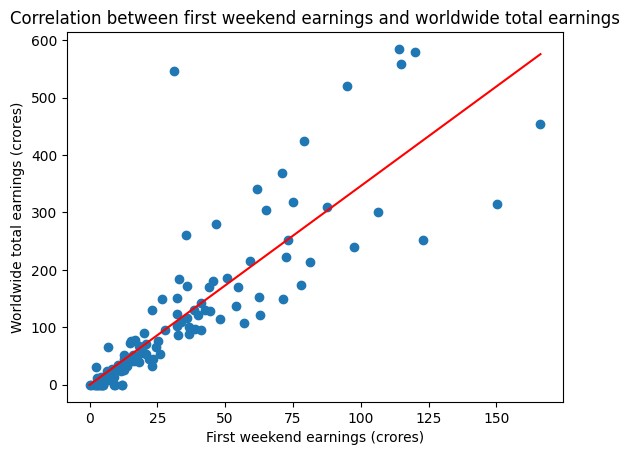

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fhandle = open('bollywood_box_clean1.csv', 'r')
filedf = pd.read_csv('bollywood_box_clean1.csv')

weekendlist = []
worldwidelist = []
for i in filedf['movie_weekend']:
    weekendlist.append(float(i)) #appending all first weekend earnings to list
for j in filedf['movie_total_worldwide']:
    worldwidelist.append(float(j)) #appending all total worldwide earnings to list
plt.scatter(weekendlist, worldwidelist) #makes scatter plot with weekend earnings as x axis and worldwide earnings as y axis
plt.plot(np.unique(weekendlist), np.poly1d(np.polyfit(weekendlist, worldwidelist, 1))(np.unique(weekendlist)), 'r-')
#the above code plots the line of best fit
#np.unique() finds the unique elements of list with weekend earnings: this is the x axis for the line
#np.poly1d() defines the polynomial function explained below: this is the y axis for the line
#np.polyfit() finds the least squares regression by fitting least squares of function with weekend earnings as x and worldwide earnings as y with a degree of 1
plt.title('Correlation between first weekend earnings and worldwide total earnings')
plt.xlabel('First weekend earnings (crores)')
plt.ylabel('Worldwide total earnings (crores)')
#adds chart/axis titles
plt.show()

Many of the points are clustered around the line of best fit, so it is clear that there is a moderately strong positive correlation between first weekend earnings and worldwide total earnings, meaning that higher earnings during the first weekend means there will be higher total worldwide earning too.